# Lending Club Case Study

In [4]:
# Importing computing libraries
import numpy as np
import pandas as pd

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading csv files
loan_data = pd.read_csv('/Users/charmilavanama/Machine_Learning_AI_Course/Lending_Club_Case_Study_2021/loan.csv', low_memory=False)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# shape of data set
loan_data.shape

(39717, 111)

## Understanding data

_The data or columns that can be used for analysing the profile of a person to identify that individual has high chances to charged off can be identified with information that bank collects before lending the loan, So the data from the loans dataset can broadly be categorized into two, as follows:_

> 1. Information collected/requried before lending the loan
> 2. Information collected/required after lending the loan

_Based on this, for this analysis, the category 1 is required_
_Hence, the columns required for this analysis are:_
> - loan_amnt
> - funded_amnt
> - funded_amnt_inv
> - term
> - int_rate
> - installment
> - grade
> - sub_grade
> - emp_title
> - emp_length
> - home_ownership
> - annual_inc
> - verification_status
> - issue_d
> - loan_status
> - purpose
> - addr_state
> - dti
> - pub_rec_bankruptcies

In [7]:
# Extracting information based on the above mentioned columns
required_columns = ['loan_amnt',
'funded_amnt',
'funded_amnt_inv',
'term',
'int_rate',
'installment',
'grade',
'sub_grade',
'emo_title',
'emp_length',
'home_ownership',
'annual_inc',
'verification_status',
'issue_d',
'loan_status',
'purpose',
'addr_state',
'dti',
'pub_rec_bankruptcies'];

eleminate_columns = [i for i in loan_data.columns if i not in required_columns]
for x in eleminate_columns:
    loan_data = loan_data.drop(x, axis=1)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0


## Data Cleaning and Manipulation

**Redundant data**

_For this analysis, we don't need items that are "current" in loan status as these are for people who are still in the process of paying loan so no decision can be taken using this data. So, there is only need to analyse the patterns for people whos status is "fully paid" and "charged off"_

In [8]:
loan_data = loan_data[loan_data.loan_status != 'Current']
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [9]:
loan_data.dropna(inplace=True)
loan_data.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
39562,4800,4800,1100.0,36 months,10.28%,155.52,C,C1,1 year,RENT,35000.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,VA,7.51,1.0
39573,7000,7000,1000.0,36 months,10.59%,227.82,C,C2,3 years,MORTGAGE,63500.0,Not Verified,Nov-07,Fully Paid,debt_consolidation,AZ,8.50,1.0
39623,9000,9000,700.0,36 months,12.49%,301.04,D,D3,8 years,MORTGAGE,39000.0,Not Verified,Oct-07,Charged Off,debt_consolidation,MD,5.08,1.0
39666,15450,15450,600.0,36 months,11.22%,507.46,C,C4,2 years,MORTGAGE,40000.0,Not Verified,Aug-07,Charged Off,debt_consolidation,VA,13.50,1.0
39680,3000,3000,525.0,36 months,11.86%,99.44,D,D1,2 years,MORTGAGE,36153.0,Not Verified,Aug-07,Fully Paid,debt_consolidation,IN,7.47,1.0


**Converting data to suitable format**

_For calucation purposes, it is better to remove unnecessary things and keep all items in a column consistent throughout_

In [10]:
# No need of '%' in "int_rate" column
loan_data['int_rate'] = loan_data.int_rate.str.strip('%').astype(float)
# No need of 'months' in "term" column
loan_data['term'] = loan_data.term.str.strip('months')
# No need of 'years' in "emp_length" column
loan_data['emp_length'] = loan_data['emp_length'].apply(lambda p : ("".join(filter(str.isdigit, str(p)))))

loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [11]:
pd.to_numeric(loan_data['emp_length'])

0        10
1         1
2        10
3        10
5         3
         ..
39562     1
39573     3
39623     8
39666     2
39680     2
Name: emp_length, Length: 36847, dtype: int64

In [12]:
pd.to_numeric(loan_data['term'])

0        36
1        60
2        36
3        36
5        36
         ..
39562    36
39573    36
39623    36
39666    36
39680    36
Name: term, Length: 36847, dtype: int64

**Derived Data**

_Manupulating strings and dates_

**Data-Driven**

In [13]:
#changing the issue_d format
loan_data['issue_d'] = pd.to_datetime(loan_data.issue_d, format='%b-%y')

#creating new column issued_d year from existing column issue_d
loan_data['issue_year'] = loan_data.issue_d.dt.year
# creating new column issued_d month from existing column issue_d
loan_data['issue_month'] = loan_data.issue_d.dt.month
#issue_year.value_counts()
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12
1,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,2011,12
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2011,12
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,2011,12
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0.0,2011,12


## Data Analysis

In [14]:
loan_data['int_rate'].describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

In [15]:
loan_data['emp_length'].describe()

count     36847
unique       10
top          10
freq       8369
Name: emp_length, dtype: object

In [16]:
loan_data['dti'].describe()

count    36847.000000
mean        13.330449
std          6.651565
min          0.000000
25%          8.210000
50%         13.420000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [17]:
loan_data['loan_status'].describe()

count          36847
unique             2
top       Fully Paid
freq           31566
Name: loan_status, dtype: object

### Univariate Analysis

_Univariate analysis means analysing one variable at a time. Sigle variable needs to be analysed clearly before further analysing the multiple variables or whole dataset._

<AxesSubplot:ylabel='int_rate'>

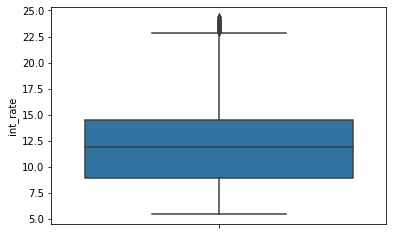

In [18]:
sns.boxplot(y='int_rate', data = loan_data)

_Observation:_ The int_rate is between 5 to 25

In [19]:
loan_data['loan_status'].value_counts()

Fully Paid     31566
Charged Off     5281
Name: loan_status, dtype: int64

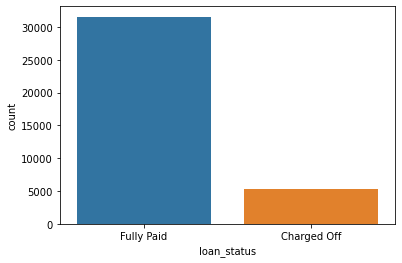

In [20]:
sns.countplot(x = loan_data["loan_status"])
plt.show()

_Observation:_ There are very few members who comes under charged off category, that is arround 14.6%

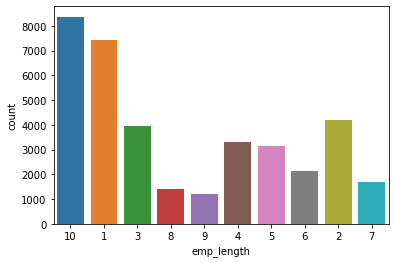

In [21]:
sns.countplot(x = loan_data["emp_length"])
plt.show()

_Observation:_ Max number of loans are taken by members who are 10 years or more than 10 years of experience

Next max number of loans are taken by members who are 1 year of experience


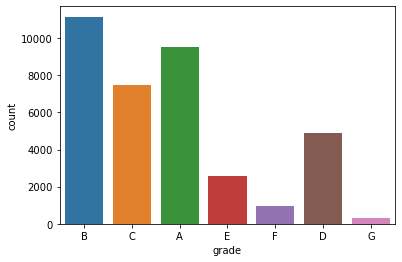

In [22]:
sns.countplot(x = loan_data["grade"])
plt.show()

_Observation:_ Common loan grades are B and A

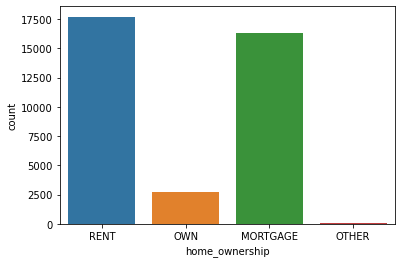

In [23]:
sns.countplot(x = loan_data["home_ownership"])
plt.show()

_Obervation:_ Most of the members who took the loan either stay in rented or have their house in mortgage. On the other side, the members who stay there are very few percentage of memebers who own a house borrowed loan

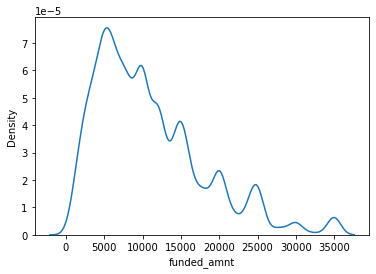

In [24]:
sns.kdeplot(loan_data['funded_amnt'])
plt.show()

_Observation:_ The most common funded amount (total amount commited to the loan) is from 5000 to 10000

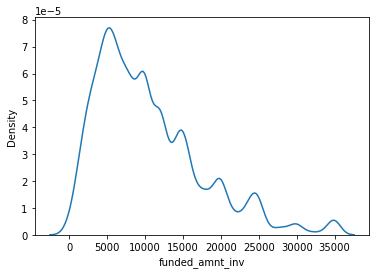

In [25]:
sns.kdeplot(loan_data['funded_amnt_inv'])
plt.show()

Observation: The most common funded amount (total amount commited to the loan) is from 5000 to 10000. Furthermore, there is no much difference between funded amount committed and funded amount committed by invertors

In [26]:
plt.figure(figsize=(24,9), dpi= 800)
sns.countplot(x = loan_data["purpose"])
plt.show()

_Observation:_ Most of the members who borrowed the loan is for debt_consolidation and next common purpose is credit_card. However, least purpose for which loan is borrowed is renewable_energy

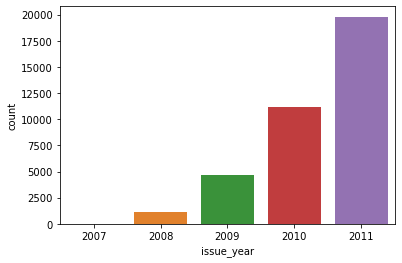

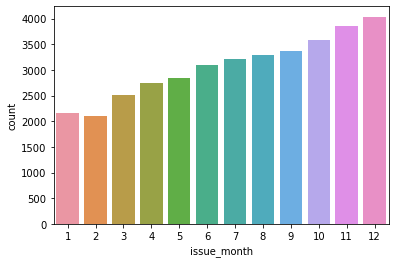

In [27]:
sns.countplot(x = loan_data["issue_year"])
plt.show()
sns.countplot(x = loan_data["issue_month"])
plt.show()

_Observation:_ Most of the loans are issued in year 2011 and especially in month of Decemenber. The number of issued loans gradually increased from January to December gradually.

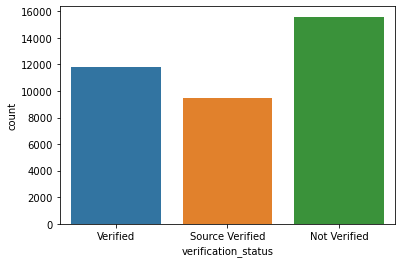

In [28]:
sns.countplot(x = loan_data["verification_status"])
plt.show()

_Observation:_ Income source of most of the members are not verified

### Segmented Univariate Analysis

Comparisions of averages, other metrics, and basis of different metrics (mean, midean.. etc)

### 1. Comparision of other metrics with interest rate

_**int_rate vs term**_

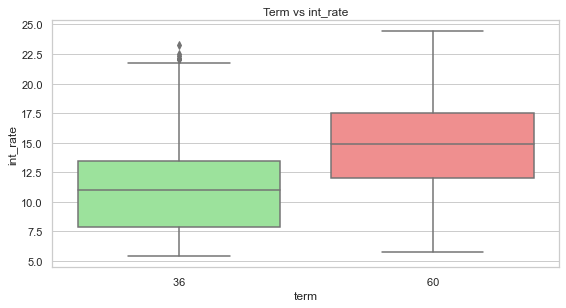

In [29]:
colors = ["#90EE90", "#FF7F7F"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.boxplot(x= 'term', y = 'int_rate', data = loan_data)
plt.title('Term vs int_rate')
plt.show()

Highest term have highest interest rate

_**int_rate vs emp_length**_

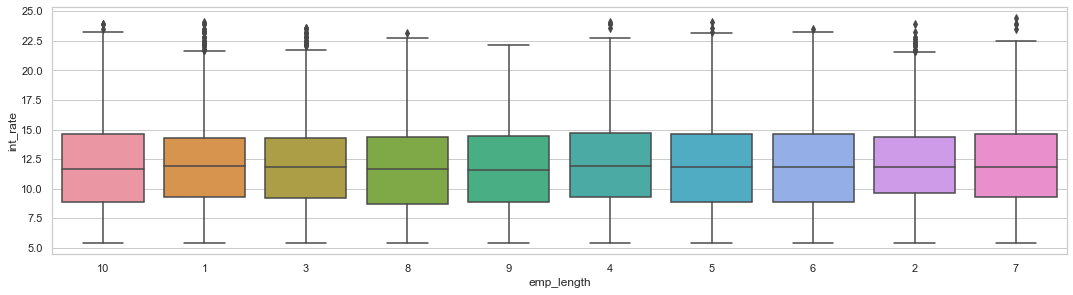

In [30]:
colors = ["#90EE90", "#FF7F7F"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
plt.figure(figsize=(40, 10))
plt.subplot(2,2,1)
sns.boxplot(x= 'emp_length', y = 'int_rate', data = loan_data)
plt.show()

_Observaton:_ The median accross all experiemce levels are same. Interquartile range is high for 10 years experience

_**purpose vs int_rate**_

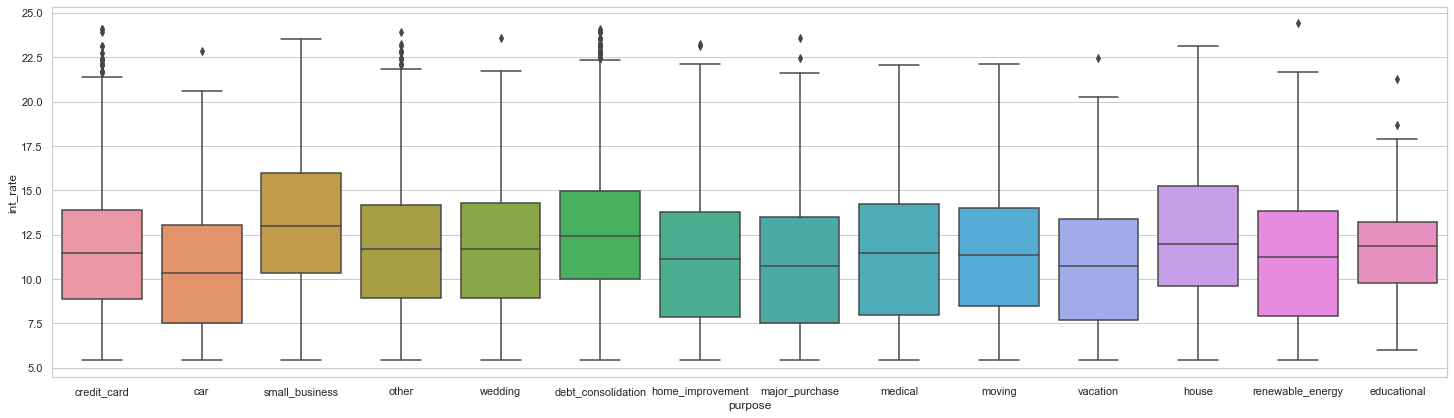

In [31]:
plt.figure(figsize=(55, 15))
plt.subplot(2,2,1)
sns.boxplot(x= 'purpose', y = 'int_rate', data = loan_data)
plt.show()

_Observation:_ High interest rate is offered to small business. Next high interest rate is offered to house. Intereset rates are lower for car.

_**int_rate vs grade**_

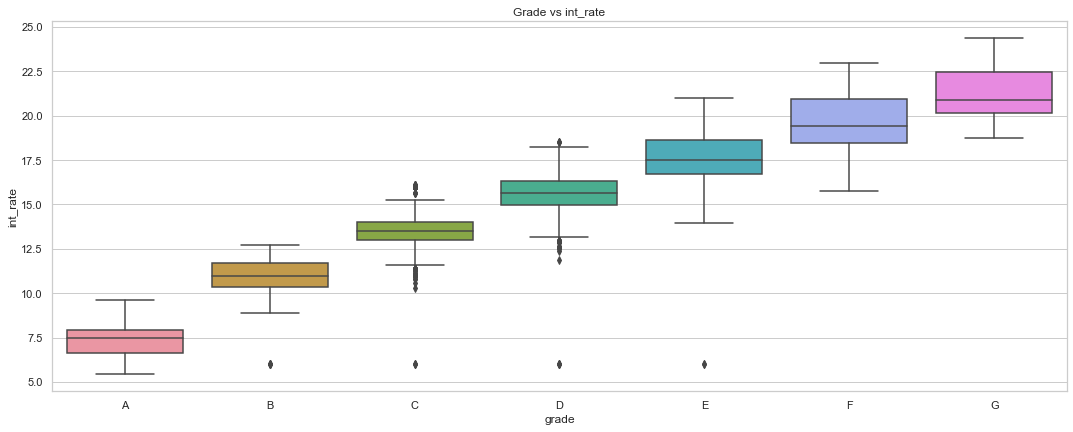

In [32]:
colors = ["#90EE90", "#FF7F7F"]
sns.set(style='whitegrid', palette=sns.color_palette(colors))
plt.figure(figsize=(40, 15))
plt.subplot(2,2,1)
grade_order = loan_data.grade.unique()
grade_order.sort()
sns.boxplot(x= 'grade', y = 'int_rate', order = grade_order, data = loan_data)
plt.title ('Grade vs int_rate')
plt.show()

Interest rate is increasing from grades A to G. IQR is higer for grade F and G. Median, 25%, 75% is increasing from grades A to G

_**int_rate vs home_ownership**_

NameError: name 'loan_data1' is not defined

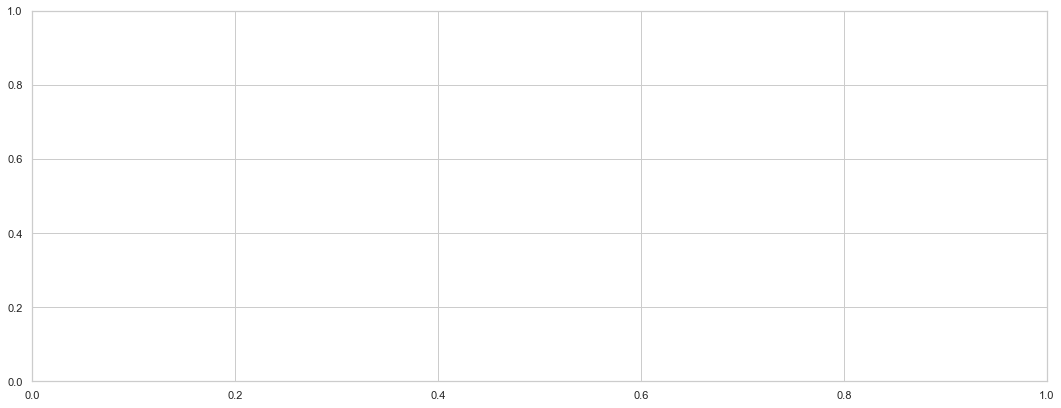

In [33]:
sns.set(style='whitegrid', palette=sns.color_palette(colors))
plt.figure(figsize=(40, 15))
plt.subplot(2,2,1)
sns.boxplot(x= 'home_ownership', y = 'int_rate', data = loan_data1)
plt.title ('Home ownership vs int_rate')
plt.show()

_Observation:_ Interest rate is increasing from mortgage to own to rent. IQR is highest for members who have mortgage home. IQR is low for members who has rented house

_**int_rate vs verification_status**_

<AxesSubplot:title={'center':'verification_status vs int_rate'}, xlabel='verification_status', ylabel='int_rate'>

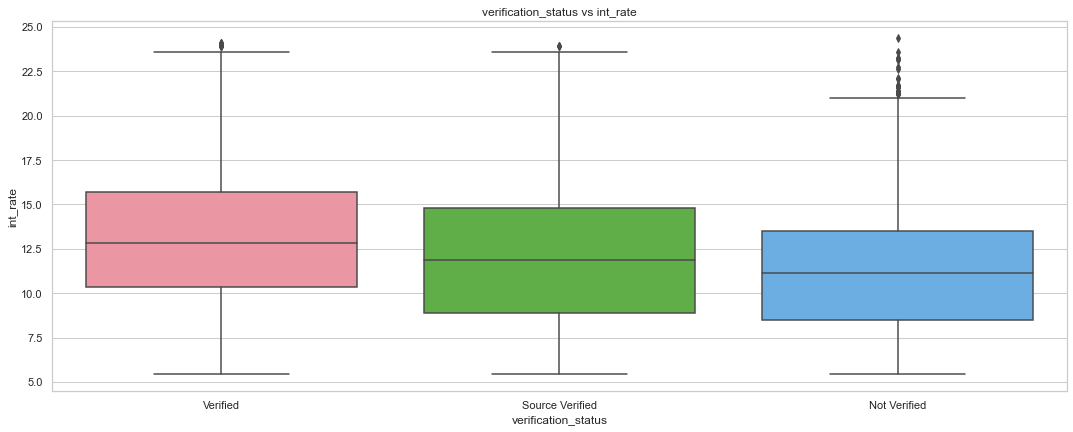

In [34]:
sns.set(style='whitegrid', palette=sns.color_palette(colors))
plt.figure(figsize=(40, 15))
plt.subplot(2,2,1)
plt.title('verification_status vs int_rate')
sns.boxplot(x='verification_status', y='int_rate', data=loan_data)

_Observation:_ interest rate is more for verified members and less for not verified members. 

_**int_rate vs issued_y and int_rate vs issued_m**_

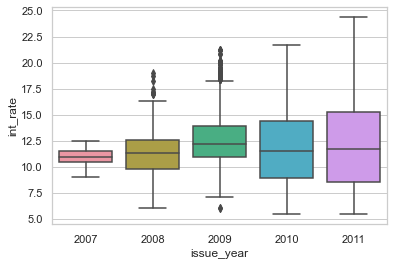

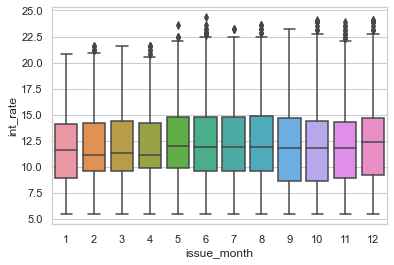

In [35]:
sns.boxplot(x='issue_year', y='int_rate', data = loan_data)
plt.show()
sns.boxplot(x='issue_month', y='int_rate', data = loan_data)
plt.show()

_Observation:_ High number of loans are issued in year 2011 and with high interest rates. In first quater there seems decrease in the median of interest rate. In second quarter, there is slight increase in median. In 3rd quarter, is almost same as previous quarter. In final quarter, we can see a gradual increse in the median

### 2. Comparison of other metrics with loan amount

_**loan_amnt vs loan_status**_

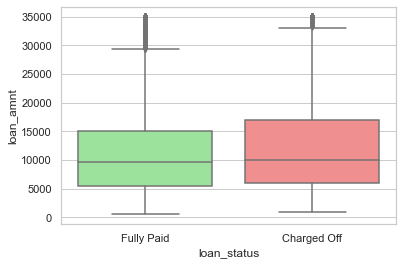

In [36]:
sns.boxplot(x='loan_status', y='loan_amnt', data = loan_data)
plt.show()

_Observation:_ The median and 25% of both fully_paid and Charged_off is same. However, 75% of charged off is higer than fully_paid

_**loan_amt vs grade**_

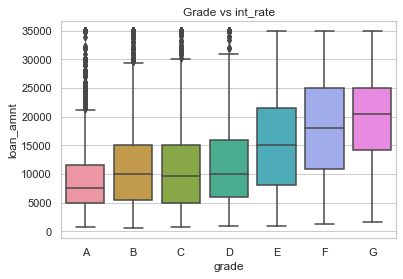

In [37]:
sns.boxplot(x= 'grade', y = 'loan_amnt', order = grade_order, data = loan_data)
plt.title ('Grade vs int_rate')
plt.show()

_Observation:_ Loan amount increased from grades A to G and with respect to it, the 25%, 75% and median also increased.

_**loan_amnt vs home_ownership**_

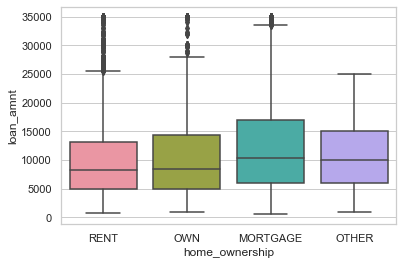

In [38]:
sns.boxplot(x='home_ownership', y='loan_amnt', data = loan_data)
plt.show()

_Observation_: Loan amount is higher to lowest from mortgage, own and rent. This observation is opposite to int_rate. That means, for less loan amout hight interest rates are charged.

_**loan_amnt vs emp_length**_

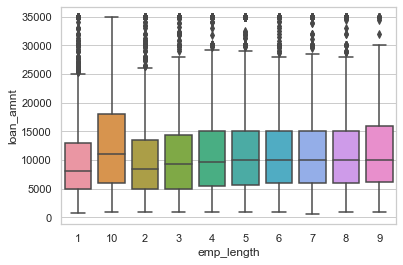

In [39]:
emp_length_order = loan_data.emp_length.unique()
emp_length_order.sort()
sns.boxplot(x='emp_length', y='loan_amnt', order = emp_length_order, data = loan_data)
plt.show()

_Observations:_ Members with experience level 10 are offered high loan amount. And, with experience level, the loan amount also increased.

_**loan_amnt vs issued_y and loan_amnt vs issued_m**_

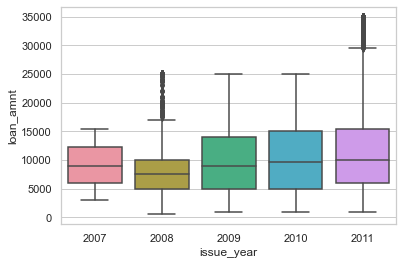

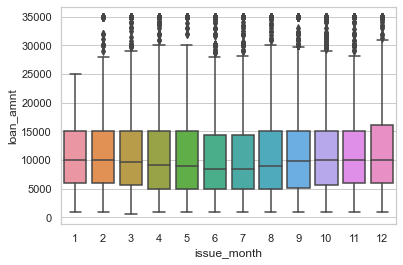

In [40]:
sns.boxplot(x='issue_year', y='loan_amnt', data = loan_data)
plt.show()
sns.boxplot(x='issue_month', y='loan_amnt', data = loan_data)
plt.show()

Observation: Loan amount is higher in 2010 and 2011. In first quater the loan amount remains almost same. In second quarter, there is slight decrease in median, however, this observation is opposite in case of intereset rate. In 3rd quarter, ithe median increased gradually. In final quarter, we can see a the median remain same.

_**loan_amnt vs purpose**_

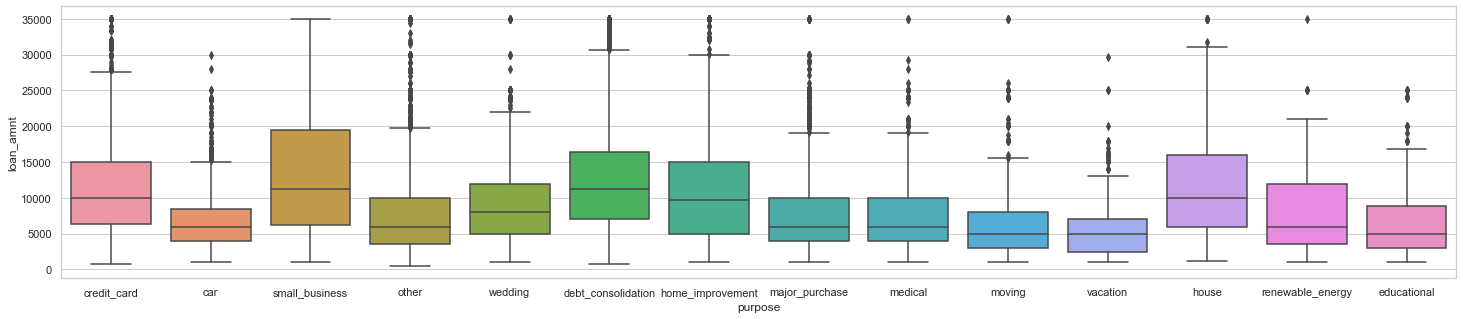

In [41]:
plt.figure(figsize=(25,5))
sns.boxplot(x='purpose', y='loan_amnt', data = loan_data)
plt.show()

_Observation:_ Highest loan amount is offered to small business purpose, hence, high interest rate  is also offered to small budiness. Hence, bank will face loss if charged off decision is not correctly decided in this category

_**loan_amnt vs verification_status**_

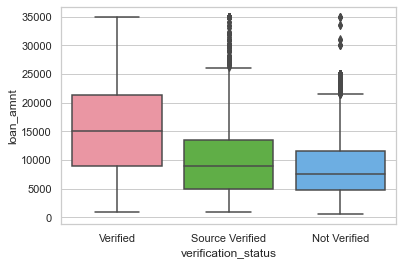

In [42]:
sns.boxplot(x='verification_status', y='loan_amnt', data = loan_data)
plt.show()

_Observation:_ Verified customers are offered high loan amount

### 3. Comparision of other metrics with DTI

_**DTI vs term**_

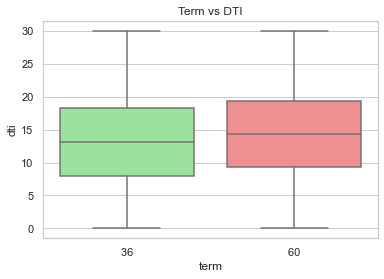

In [43]:
sns.boxplot(x='term', y='dti', data = loan_data)
plt.title('Term vs DTI')
plt.show()

Debt to income ratio is higher for members who opted for longer terms. Because, less term period will lead to low dti

_**DTI vs loan_status**_

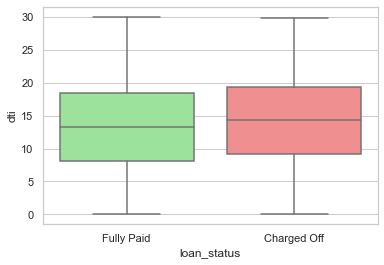

In [44]:
sns.boxplot(x='loan_status', y='dti', data = loan_data)
plt.show()

_Observation:_ Members having high debt to income ratio has high chances to default

_**DTI vs emp_length**_

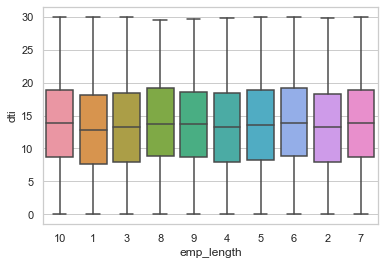

In [45]:
sns.boxplot(x='emp_length', y='dti', data = loan_data)
plt.show()

_Observation:_ IQR, median are almost same for all experience levels

_**DTI vs grade**_

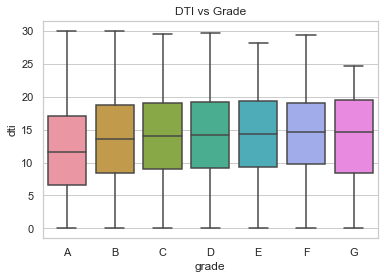

In [46]:
sns.boxplot(x= 'grade', y = 'dti', order = grade_order, data = loan_data)
plt.title("DTI vs Grade")
plt.show()

_Observation:_ 25% of grade "A" is less than all other grades. 75% of all grades other than grade A are almost oin the same level.

_**DTI vs home_ownership**_

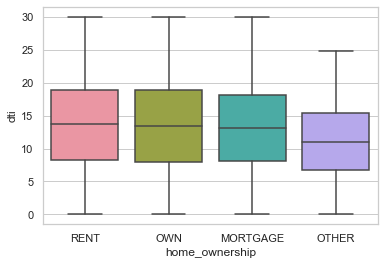

In [47]:
sns.boxplot(x='home_ownership', y='dti', data = loan_data)
plt.show()

_Observation:_ Median is almost same even if memebers have rent or own oe mortgage. However, IQR range is slightly higer for members with own houses

_**DTI vs purpose**_

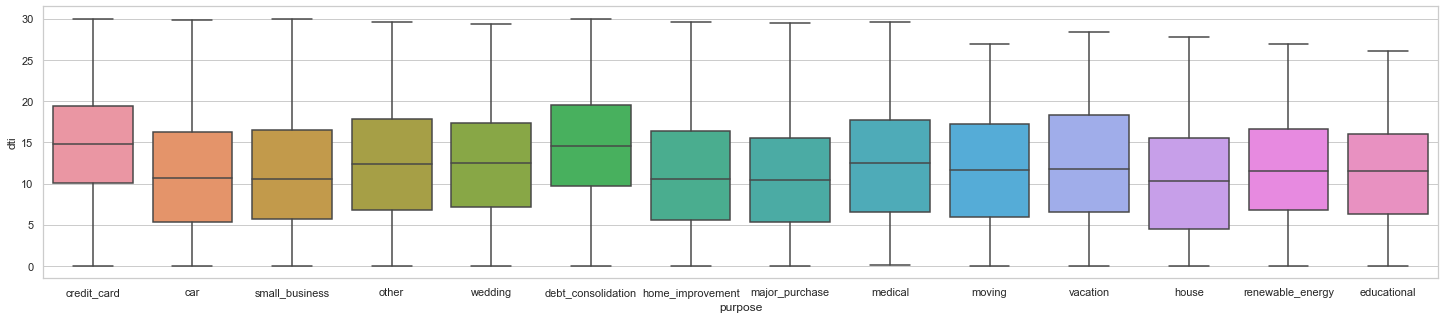

In [48]:
plt.figure(figsize=(25,5))
sns.boxplot(x='purpose', y='dti', data = loan_data)
plt.show()

_Observation:_ The 75% is high for purpose of loans for credit card and debt_consolidation. Whereas, 75% is low for loans on house. IQR range is higher for vacation pruose. 

### 4. Comparision of annual_inc with other metrics

**annual_inc vs grade**

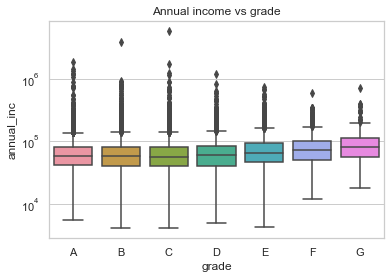

In [49]:
plt.title('Annual income vs grade')
sns.boxplot(x='grade', y= 'annual_inc', order = grade_order, data= loan_data)
plt.yscale('log')

_Observations:_ Annual income from grade A to D are almost similar. However, annual income increased from grades E to G

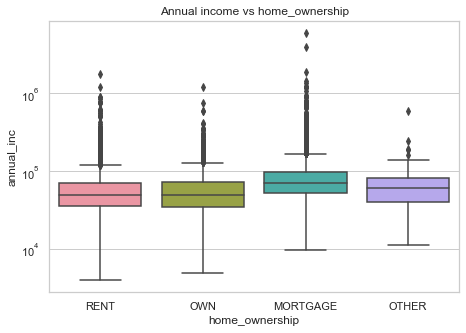

In [50]:
plt.figure(figsize=(25,5))
plt.subplot(132)
plt.title('Annual income vs home_ownership')
sns.boxplot(x='home_ownership', y= 'annual_inc', data= loan_data)
plt.yscale('log')

_Observations:_ annual income is high for homw ownership as mortage. Whereas, income is less where members own a house

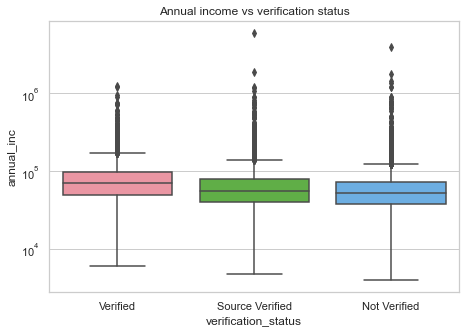

In [51]:
plt.figure(figsize=(25,5))
plt.subplot(132)
plt.title('Annual income vs verification status')
sns.boxplot(x='verification_status', y= 'annual_inc', data= loan_data)
plt.yscale('log')

_Observations:_ Memebers whos income is verified has high annual income

**annual_inc vs loan_status**

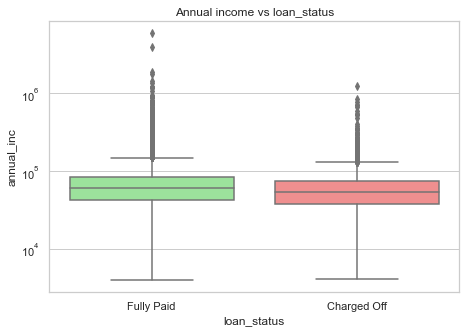

In [52]:
plt.figure(figsize=(25,5))
plt.subplot(132)
plt.title('Annual income vs loan_status')
sns.boxplot(x='loan_status', y= 'annual_inc', data= loan_data)
plt.yscale('log')

_Observation:_ Charged off members have low annual income

### 5. Comparision of funded amount with other metrics

*funded_amnt vs loan_status. funded_amnt vs grade. funded_amnt vs term*

<AxesSubplot:title={'center':'Grade vs Funded Amount'}, xlabel='grade', ylabel='funded_amnt'>

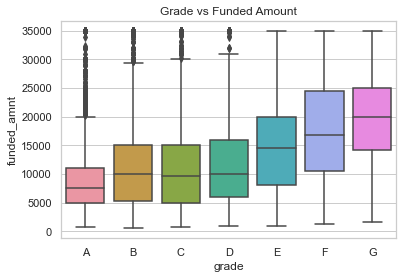

In [53]:
plt.title('Grade vs Funded Amount')
sns.boxplot(x='grade', y= 'funded_amnt', order = grade_order, data=loan_data)

_Observation:_ Funded amount is higher for grades A to G

Text(0.5, 1.0, 'Terms vs Funded Amount')

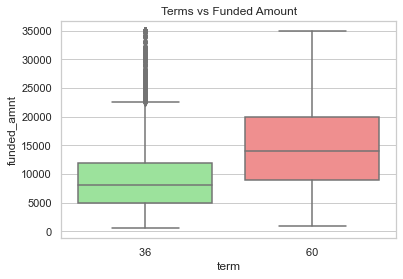

In [54]:
sns.boxplot(x='term', y= 'funded_amnt', data=loan_data)
plt.title('Terms vs Funded Amount')

_Observation:_ funded amount is high for term 60. 

Text(0.5, 1.0, 'Loan status vs Funded Amount')

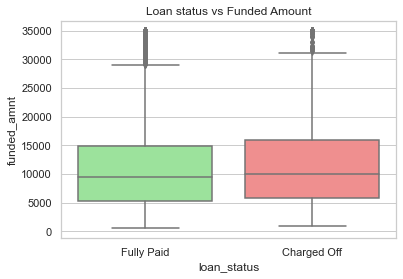

In [55]:
sns.boxplot(x='loan_status', y= 'funded_amnt', data=loan_data)
plt.title('Loan status vs Funded Amount')


_Observation:_ Charged_off members have slightly high funded amount, which says there is loss for the lending club

### Bivariate Analysis 

Bivariate analysis is essentially an extension of the segmented univariate analysis to another categorical variable.

**term vs int_rate vs loan_status**

Text(0.5, 1.0, 'Term vs Interest rate')

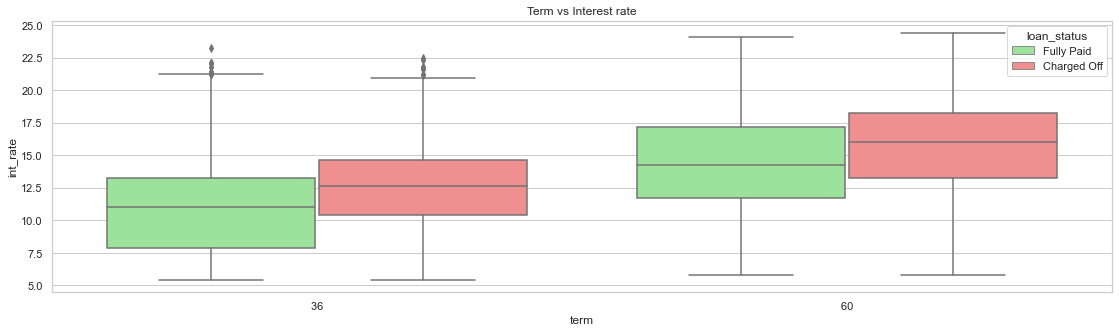

In [56]:
plt.figure(figsize=(19,5))
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=loan_data)
plt.title('Term vs Interest rate')

_Observation:_ In both cases in 36 months or 60 months, charged off members have high interest rate.

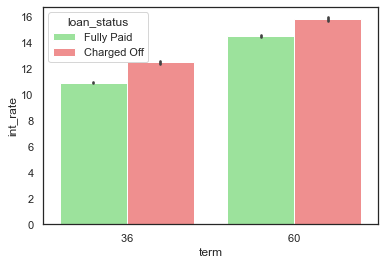

In [57]:
colors = ["#90EE90", "#FF7F7F"]
sns.set(style='white', palette=sns.color_palette(colors))
sns.barplot(x = 'term', y = 'int_rate', hue = 'loan_status', data = loan_data)
plt.show()

_Observation:_ Most common loan term is 60 months, hence, the more members who charged off took loan for a term of 60 months

**emp_length vs int_rate vs loan_status**

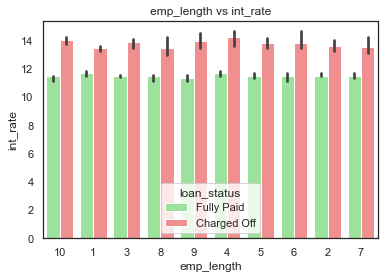

In [58]:
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data= loan_data, estimator=np.median)
plt.title('emp_length vs int_rate')
plt.show()

_Observation:_ For Any experience range, the default rate is higher at higher interest rate

**emp_length vs loan_amnt vs loan_status**

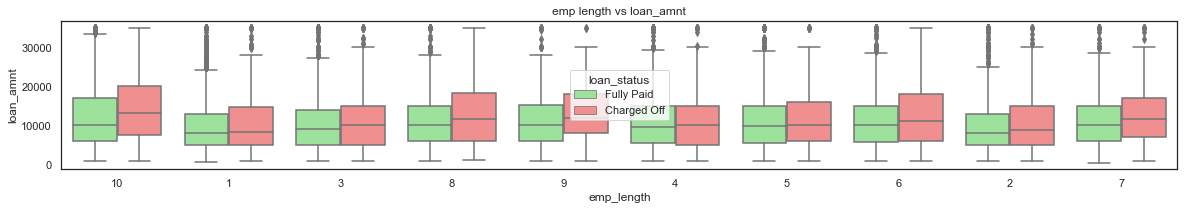

In [59]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data= loan_data)
plt.title('emp length vs loan_amnt')
plt.show()

_Observation:_ In any experience level, charged off rate is higher for higher interest rates. Except in case of 4 years experience the interest rate of fully paid and charged off is exactly same.

**emp_length vs dti vs loan_status**

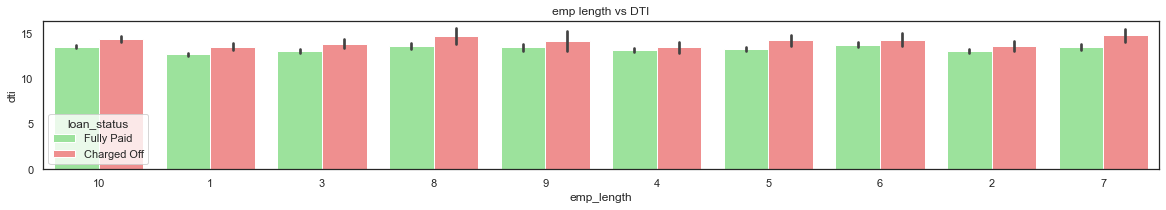

In [60]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data= loan_data)
plt.title('emp length vs DTI')
plt.show()

_Observation:_ Debt to income ratio is higher for 8 and 7 years experience. Charged off percentage is higher for those who have higher DTI.

**Grade vs loan_amnt vs loan_status**

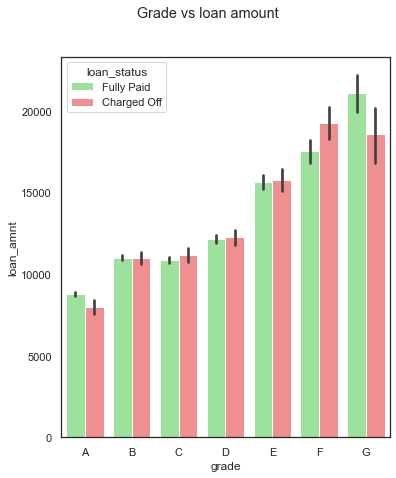

In [61]:
plt.figure(figsize=(20,7))
plt.subplot(132)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=loan_data, order = grade_order)
plt.suptitle('Grade vs loan amount')
plt.show()

_Observation:_ Grade G has highest loan amount, however, charged off rate is low. Grade A have lowest loan amount and charged off rate is also low. Whereas, in all other grades like B, C, D, E, and F, charged off rate is same or higher than fully paid rate.

**Grade vs int_rate vs loan_status**

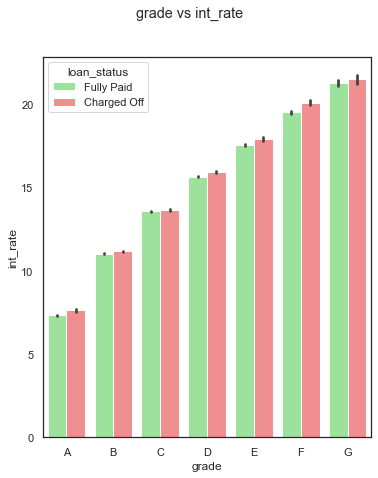

In [62]:
plt.figure(figsize=(20,7))
plt.subplot(132)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=loan_data, order = grade_order)
plt.suptitle('grade vs int_rate')
plt.show()

_Observation:_ Interest rate increased from grade A to G, this might be beacuse, the loan amount is also increasing from grade A to G. However, the charged off rate is almost same or slightly more than the fully paid rate

**grade vs dti vs loan_status**

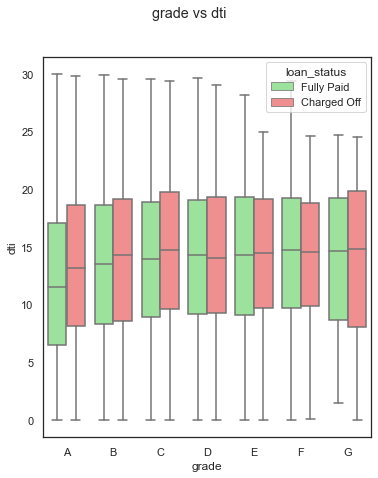

In [63]:
plt.figure(figsize=(20,7))
plt.subplot(132)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=loan_data, order = grade_order)
plt.suptitle('grade vs dti')
plt.show()

_Observation:_ Grade A have visible difference between fully paid and charged off members dti ratio. Grade E and F have less percentage of charged off rate as compared to fully paid

**emp_length vs loan_amnt vs loan_status**

<AxesSubplot:xlabel='emp_length', ylabel='loan_amnt'>

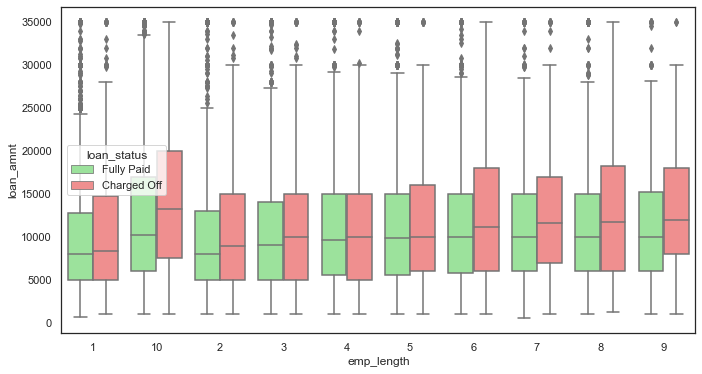

In [64]:
plt.figure(figsize=(25,6))
plt.subplot(121)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', order = emp_length_order, data=loan_data)

_Observations:_ For all the experience levels, the fully paid members have less loan amount as compared to charged off members. From this graph, we can say that members who have high loan amount have high chances of getting charged off

<AxesSubplot:xlabel='emp_length', ylabel='int_rate'>

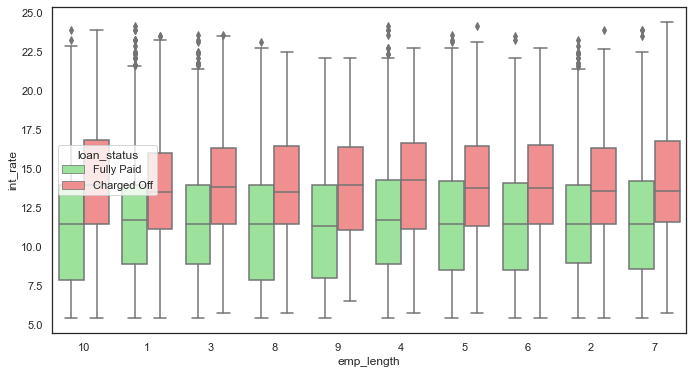

In [65]:
plt.figure(figsize=(25,6))
plt.subplot(121)
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=loan_data)

_Observation:_ There is high difference in interest rate between charged off and fully paid memebers, accross all experiemce levels. 

<AxesSubplot:xlabel='emp_length', ylabel='dti'>

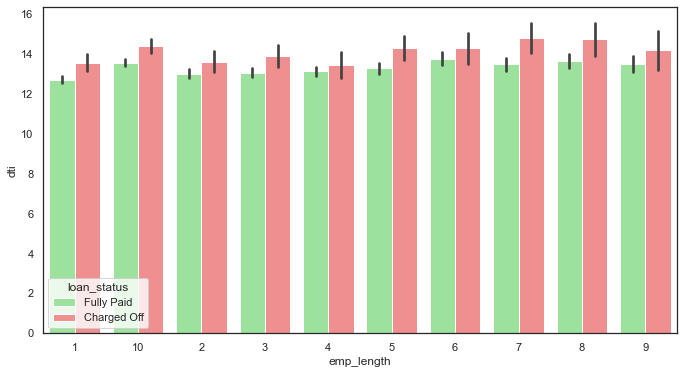

In [66]:
plt.figure(figsize=(25,6))
plt.subplot(121)
sns.barplot(x='emp_length', y='dti', hue='loan_status', order = emp_length_order, data=loan_data)

_Observation:_ Debt to income ratio is higher for charged off memebers as compared to fully paid memebers, accross all experience levels

**Home_ownership vs int_rate vs loan_status**

<AxesSubplot:xlabel='home_ownership', ylabel='int_rate'>

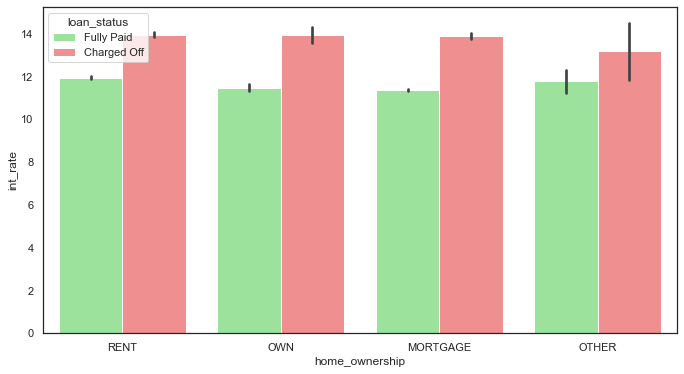

In [67]:
plt.figure(figsize=(25,6))
plt.subplot(121)
sns.barplot(x='home_ownership', y='int_rate', hue='loan_status', data=loan_data)

_Observation:_ Charged off rate is higher at higher interest rate across all kinds of home ownership

<AxesSubplot:xlabel='home_ownership', ylabel='loan_amnt'>

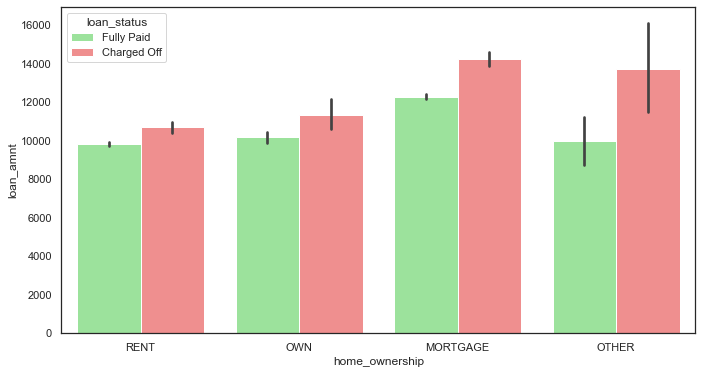

In [68]:
plt.figure(figsize=(25,6))
plt.subplot(121)
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=loan_data)

_Observation:_ With loan amount being higher, the charged off rate is higher accross all types of home ownership. This is might be cecause of higher interest rates charged for high loan amounts

<AxesSubplot:xlabel='home_ownership', ylabel='dti'>

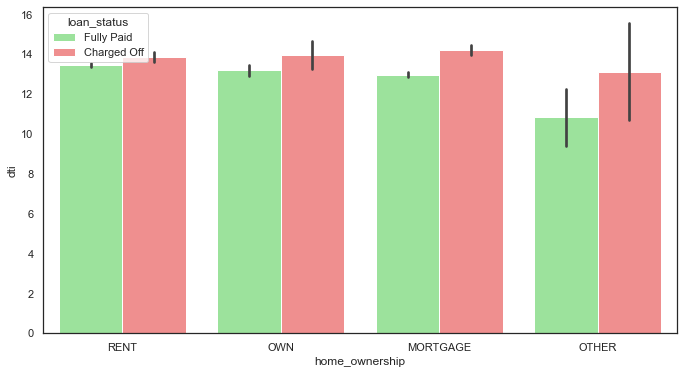

In [69]:
plt.figure(figsize=(25,6))
plt.subplot(121)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=loan_data)

_Observation:_ Higher debt to income ratio is for mortgage type. However, charged off rate is higher than the fully payed members, across all types of home ownership types. The dti level is lesser for fully paid customers. So, adding dti aspect along with interest rate will help the club to take a informed decisions while lending loan